In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import joblib
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from pandas import Series, DataFrame

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge,RidgeCV#线性回归模型的岭回归
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPRegressor


# from sklearn.externals import joblib
from sklearn.utils import shuffle
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier     #随机森林用于分类
from sklearn.ensemble import RandomForestRegressor as RFR      #随机森林用于回归
from sklearn.model_selection import train_test_split           #划分训练集与测试集
from sklearn import metrics    
from sklearn.metrics import r2_score              #用于模型拟合优度评估
from collections import Counter
import xgboost as xgb


In [15]:
data = pd.read_excel('Data/LEF-Rdkit+Mordred_only-1420-108-filter_afterprogress.xlsx',index_col=0)
random_data = shuffle(data)
data

,NAME,LEF,AATS2d,AATS2m,AATS1v,AATS0i,ATSC0dv,ATSC1dv,ATSC3dv,ATSC4dv,...,Chi4v,HallKierAlpha,Kappa1,Kappa2,Kappa3,SMR_VSA5,NOCount,NumHeteroatoms,NumRotatableBonds,MolLogP
0,79-06-1,-224.0,2.000000,66.953236,220.990654,170.166268,41.600000,7.560000,-29.520000,-13.680000,...,0.000000,-0.79,4.210000,1.521526,3.210000,0.000000,2,2,1,-0.34230
1,79-09-4,-510.8,1.812500,55.342566,210.818952,169.162868,52.545455,15.322314,-33.479339,-31.537190,...,0.000000,-0.53,4.470000,1.758184,3.470000,13.344559,2,2,1,0.48100
2,51-79-6,-497.3,1.894737,61.193475,200.027602,173.611482,64.769231,22.059172,-41.526627,-35.650888,...,0.142259,-0.73,5.270000,2.504192,3.270000,6.923737,3,3,1,0.10160
3,55-63-0,-370.0,2.933333,129.221864,231.264568,180.387654,139.200000,28.160000,8.120000,-105.040000,...,0.518670,-2.40,12.600000,6.114543,7.944828,6.103966,12,12,8,-1.02010
4,56-81-5,-669.6,2.095238,52.597665,198.072791,172.577010,57.428571,-12.040816,7.816327,-8.000000,...,0.057735,-0.12,5.880000,3.084918,2.137732,6.103966,3,3,2,-1.66810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,146377-62-0,-467.7,2.805556,70.286882,262.222473,171.306364,99.809524,7.619048,-39.877551,-12.217687,...,0.920453,-0.92,8.179206,4.062325,3.119022,19.267088,0,2,3,2.88430
1464,150895-64-0,131.9,3.274510,38.871778,247.071024,162.562538,41.846154,18.242604,-15.550296,-25.822485,...,2.830849,0.00,5.625000,1.440000,0.627200,39.027845,0,0,2,2.83260
1465,150895-65-1,134.1,3.274510,38.871778,247.071024,162.562538,41.846154,18.242604,-15.550296,-25.822485,...,2.830849,0.00,5.625000,1.440000,0.627200,39.027845,0,0,2,2.83260
1466,162047-90-7,-217.9,2.342105,48.404518,215.982377,167.644605,73.272727,31.785124,-26.966942,-46.561983,...,0.680669,-0.55,8.450000,3.470660,2.477911,32.290168,2,2,3,1.71518


交叉验证Running time: 0:05:32.617568 Seconds
1


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   13.8s remaining:   13.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   22.6s finished


交叉验证Running time: 0:05:30.881661 Seconds
2


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   11.8s remaining:   11.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.7s finished


交叉验证Running time: 0:05:28.034392 Seconds
3


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   12.2s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.2s finished


交叉验证Running time: 0:05:23.317218 Seconds
4


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   12.3s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.1s finished


交叉验证Running time: 0:05:14.129676 Seconds
5


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   17.8s remaining:   17.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   35.2s finished


交叉验证Running time: 0:05:05.522675 Seconds
6


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   27.9s remaining:   27.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   36.4s finished


交叉验证Running time: 0:04:55.072687 Seconds
7


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   30.9s remaining:   30.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   39.4s finished


交叉验证Running time: 0:04:44.442367 Seconds
8


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   26.4s remaining:   26.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   35.7s finished


交叉验证Running time: 0:04:39.610447 Seconds
9


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   31.8s remaining:   31.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   44.6s finished


交叉验证Running time: 0:04:28.267945 Seconds
10


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   25.2s remaining:   25.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   42.3s finished


交叉验证Running time: 0:04:20.836046 Seconds
11


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   25.0s remaining:   25.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   44.7s finished


交叉验证Running time: 0:04:11.022854 Seconds
12


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   17.4s remaining:   17.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   35.8s finished


交叉验证Running time: 0:03:57.505406 Seconds
13


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   29.4s remaining:   29.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   47.1s finished


交叉验证Running time: 0:03:48.142547 Seconds
14


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   30.2s remaining:   30.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   39.3s finished


交叉验证Running time: 0:03:34.823882 Seconds
15


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   31.8s remaining:   31.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   35.9s finished


交叉验证Running time: 0:03:28.819903 Seconds
16


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   30.5s remaining:   30.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   39.6s finished


交叉验证Running time: 0:03:13.185277 Seconds
17


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   31.8s remaining:   31.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   39.4s finished


交叉验证Running time: 0:03:02.314265 Seconds
18


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   26.6s remaining:   26.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   30.9s finished


交叉验证Running time: 0:02:49.702382 Seconds
19


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   23.8s remaining:   23.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   30.4s finished


交叉验证Running time: 0:02:40.041135 Seconds
20


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   25.0s remaining:   25.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   32.3s finished


交叉验证Running time: 0:02:29.989202 Seconds
21


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   23.8s remaining:   23.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   32.9s finished


交叉验证Running time: 0:02:17.649233 Seconds
22


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   23.5s remaining:   23.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   30.9s finished


交叉验证Running time: 0:02:03.011091 Seconds
23


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   20.2s remaining:   20.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   32.4s finished


交叉验证Running time: 0:01:51.585505 Seconds
24


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   20.3s remaining:   20.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   26.5s finished


交叉验证Running time: 0:01:35.340294 Seconds
25


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   18.7s remaining:   18.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   27.3s finished


交叉验证Running time: 0:01:17.297706 Seconds
26


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   18.9s remaining:   18.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   27.1s finished


交叉验证Running time: 0:01:05.321408 Seconds
27


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   23.3s remaining:   23.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   30.3s finished


交叉验证Running time: 0:00:55.120006 Seconds
28


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   26.5s remaining:   26.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   29.3s finished


交叉验证Running time: 0:00:31.780669 Seconds
29


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   26.3s remaining:   26.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   32.2s finished


交叉验证Running time: 0:00:16.188734 Seconds
30


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   26.1s remaining:   26.1s


Running time: 1:56:45.950453 Seconds


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   30.8s finished


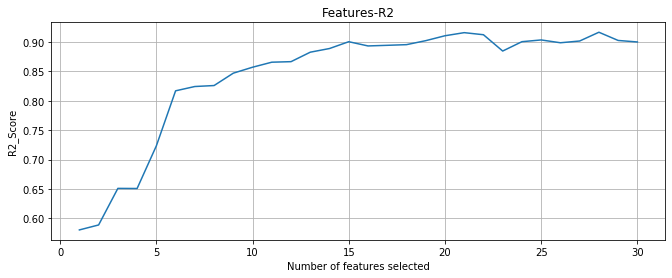

In [9]:
from sklearn.feature_selection import RFE
from pylab import xticks,yticks,np
from sklearn.model_selection import cross_val_score  # 交叉验证
from joblib import Parallel, delayed


# 定义并行函数
def parallel_rfe(selector, X, y):
    result = selector.fit_transform(X, y)
    return result,selector.support_

starttime = datetime.now()

# 定义一个准确率
high_score=0
# 最优需要多少个特征变量
num_of_features=0           
score_list =[]
screening_features = []

random_data = shuffle(random_data)
X = random_data.iloc[:,2:] #特征
y = random_data.iloc[:,1:2].values.ravel() #预测值

# X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,2:],data["Cp"], test_size = 0.3, random_state = 0)

# 数据标准化处理
stand_scaler = StandardScaler()
X_std = stand_scaler.fit_transform(X)

# 定义模型
model =MLPRegressor(random_state=1, max_iter=10000)

def coef_abs(estimator):
    return np.abs(estimator.coefs_[0].mean(axis=1))

for n in range(1,data.shape[1]-1):

    starttime_1 = datetime.now()
    rfe_model = RFE(model, n_features_to_select = n,step=1, importance_getter=coef_abs)
#         X_rfe = rfe_model.fit_transform(rest_std,y)
    X_rfe = Parallel(n_jobs=-1)(delayed(parallel_rfe)(rfe_model, X_std, y) for i in range(10))
    select_features = random_data.columns[2:][X_rfe[0][1]]
    endtime_1 = datetime.now()
    print('交叉验证Running time: %s Seconds'%(endtime_1-starttime_1))
    print(len(select_features))

    screening_features.append(select_features)
    score = cross_val_score(estimator=model, X=X_rfe[0][0], y=y, cv=10, scoring='r2',n_jobs=-1,verbose=1).mean()
#     score = r2_score(y_test_1,model.predict(X_test_rfe_model))
    score_list.append(score)

endtime = datetime.now()

print('Running time: %s Seconds'%(endtime-starttime))

# 画出不同特征数量下得分
plt.figure(figsize=(11,4))
plt.title("Features-R2")
#  选择的特征数量
plt.xlabel("Number of features selected")
# 交叉验证得分
plt.ylabel("R2_Score")

# 修改横轴坐标刻度
# xticks(np.linspace(1,11,10,endpoint=True))
# yticks(np.linspace(0.7,1,7,endpoint=True))

# 画出各个特征的得分
plt.plot(range(1, len(score_list)+1),score_list)
plt.grid()
plt.show()

In [4]:
# Rdkit+Mordrd
screening_features_1 = screening_features.copy()
score_list_1 = score_list.copy()

In [7]:
# Mordrd
screening_features_2 = screening_features.copy()
score_list_2 = score_list.copy()

In [10]:
# Rdkit
screening_features_3 = screening_features.copy()
score_list_3 = score_list.copy()

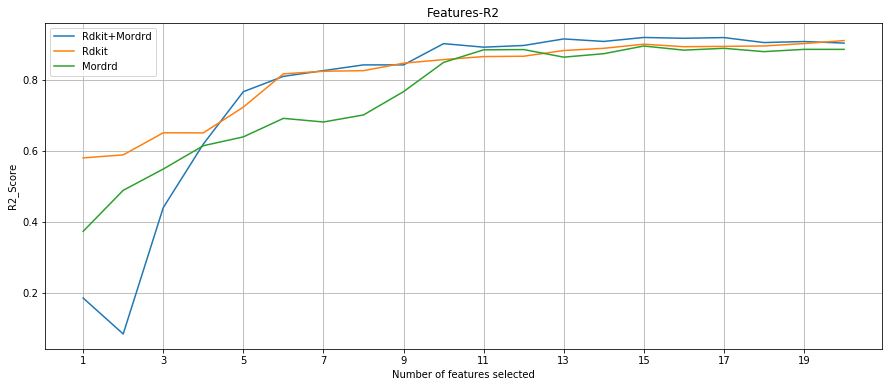

In [11]:
# 画出不同特征数量下得分
plt.figure(figsize=(15,6))
plt.title("Features-R2")
#  选择的特征数量
plt.xlabel("Number of features selected")
# 交叉验证得分
plt.ylabel("R2_Score")

# 修改横轴坐标刻度
xticks(np.linspace(1,31,16,endpoint=True))
# yticks(np.linspace(0.7,1,7,endpoint=True))

# 画出各个特征的得分

plt.plot(range(1, len(score_list_2[:20])+1),score_list_1[:20]) #Rdkit+Mordrd
plt.plot(range(1, len(score_list_3[:20])+1),score_list_3[:20]) #Rdkit
plt.plot(range(1, len(score_list_3[:20])+1),score_list_2[:20]) #Mordrd

plt.legend(['Rdkit+Mordrd', 'Rdkit', 'Mordrd'])

plt.grid()
plt.show()

In [13]:
b = 10
print('Rdkit+Mordrd','R2:',score_list_1[b-1],'Features:',screening_features_1[b-1])
print('Rdkit','R2:',score_list_3[b-1],'Features:',screening_features_3[b-1])
print('Mordrd','R2:',score_list_2[b-1],'Features:',screening_features_2[b-1])

Rdkit+Mordrd R2: 0.902174369868861 Features: Index(['AATS2m', 'ATSC0dv', 'ATSC0Z', 'ATSC3m', 'ATSC1are', 'GATS1s',
       'GATS1are', 'nBondsM', 'SMR_VSA1', 'mZagreb1'],
      dtype='object')
Rdkit R2: 0.8572332718697521 Features: Index(['MaxEStateIndex', 'BCUT2D_MRHI', 'BertzCT', 'Chi4v', 'Kappa1', 'Kappa3',
       'SMR_VSA1', 'SlogP_VSA2', 'EState_VSA5', 'VSA_EState8'],
      dtype='object')
Mordrd R2: 0.8493373312971515 Features: Index(['AATS2m', 'ATSC1dv', 'ATSC0Z', 'ATSC1are', 'ATSC1p', 'AATSC0i',
       'GATS1s', 'GATS1are', 'BCUTdv-1l', 'VSA_EState5'],
      dtype='object')


In [17]:
# 选择几个特征
c = 10
select_features = screening_features_1[c-1]
select_features = select_features.insert(0,"LEF")
select_features = select_features.insert(0,"NAME")
data.loc[:,select_features].to_excel("Data/LEF-Mordred+Rdkit_only-NNR-10-fearures.xlsx")
pd.read_excel('Data/LEF-Mordred+Rdkit_only-NNR-10-fearures.xlsx',index_col=0).head()

,NAME,LEF,AATS2m,ATSC0dv,ATSC0Z,ATSC3m,ATSC1are,GATS1s,GATS1are,nBondsM,SMR_VSA1,mZagreb1
0,79-06-1,-224.0,66.953236,41.600000,81.600000,-172.583472,-0.350029,0.901163,0.875981,2,4.794537,3.361111
1,79-09-4,-510.8,55.342566,52.545455,96.545455,-91.605303,-0.318512,0.809642,0.816129,1,9.901065,3.361111
2,51-79-6,-497.3,61.193475,64.769231,114.769231,-118.836680,-0.420676,0.816550,0.900079,1,9.531400,3.611111
3,55-63-0,-370.0,129.221864,139.200000,163.200000,49.955112,1.961530,0.757660,0.413528,3,29.772623,7.694444
4,56-81-5,-669.6,52.597665,57.428571,129.428571,2.160420,-1.030408,1.223969,1.153132,0,15.319582,3.611111


In [18]:
pd.DataFrame(list(zip(screening_features_1,score_list_1))).to_excel("Data/LEF-Mordred+Rdkit_only-NNR-score_list.xlsx")